# Sea Creatures Classification

Dataset:
https://www.kaggle.com/datasets/vencerlanz09/sea-animals-image-dataste

## TensorFlow and Keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
from tensorflow.keras.preprocessing.image import load_img

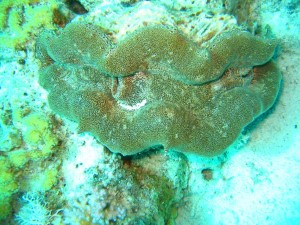

In [6]:
path = './data/Clams'
name = '10711395_a16c4c2901_o.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [7]:
img = load_img(fullname, target_size=(299, 299))

In [8]:
x = np.array(img)
x.shape

(299, 299, 3)

## Pre-trained convolutional neural networks

In [9]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [12]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [13]:
X = np.array([x])

In [14]:
X.shape

(1, 299, 299, 3)

In [15]:
X = preprocess_input(X)

In [17]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [18]:
decode_predictions(pred)

[[('n01496331', 'electric_ray', np.float32(0.16202249)),
  ('n01924916', 'flatworm', np.float32(0.093232036)),
  ('n09256479', 'coral_reef', np.float32(0.07795424)),
  ('n01917289', 'brain_coral', np.float32(0.073272)),
  ('n01950731', 'sea_slug', np.float32(0.037136476))]]

## Training the model

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2,)

In [16]:
train_ds = data_generator.flow_from_directory(
  './data',
  target_size=(150,150),
  batch_size=32,
  subset="training"
)


Found 10979 images belonging to 23 classes.


In [17]:
val_ds = data_generator.flow_from_directory(
  './data',
  target_size=(150,150),
  batch_size=32,
  subset="validation"
)

Found 2732 images belonging to 23 classes.


In [18]:
train_ds.class_indices

{'Clams': 0,
 'Corals': 1,
 'Crabs': 2,
 'Dolphin': 3,
 'Eel': 4,
 'Fish': 5,
 'Jelly Fish': 6,
 'Lobster': 7,
 'Nudibranchs': 8,
 'Octopus': 9,
 'Otter': 10,
 'Penguin': 11,
 'Puffers': 12,
 'Sea Rays': 13,
 'Sea Urchins': 14,
 'Seahorse': 15,
 'Seal': 16,
 'Sharks': 17,
 'Shrimp': 18,
 'Squid': 19,
 'Starfish': 20,
 'Turtle_Tortoise': 21,
 'Whale': 22}

In [19]:
x, y = next(train_ds)

In [20]:
y[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [21]:
base_model = Xception(
  weights='imagenet',
  include_top=False,
  input_shape=(150,150,3)
)

base_model.trainable = False


inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(23)(vectors)

model = keras.Model(inputs, outputs)

In [22]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer, loss=loss, metrics=['accuracy'])

In [23]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


344/344 ━━━━━━━━━━━━━━━━━━━━ 35s 79ms/step - accuracy: 0.5728 - loss: 2.2261 - val_accuracy: 0.6460 - val_loss: 2.2616
Epoch 2/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.7395 - loss: 1.2934 - val_accuracy: 0.6611 - val_loss: 2.2131
Epoch 3/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.7679 - loss: 1.1793 - val_accuracy: 0.6801 - val_loss: 2.3275
Epoch 4/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8198 - loss: 0.8078 - val_accuracy: 0.6962 - val_loss: 2.2706
Epoch 5/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8458 - loss: 0.6592 - val_accuracy: 0.6958 - val_loss: 2.2366
Epoch 6/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8629 - loss: 0.5753 - val_accuracy: 0.6951 - val_loss: 2.6438
Epoch 7/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8605 - loss: 0.6258 - val_accuracy: 0.6856 - val_loss: 2.7419
Epoch 8/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8740 - loss: 0.5325 - val_accurac

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


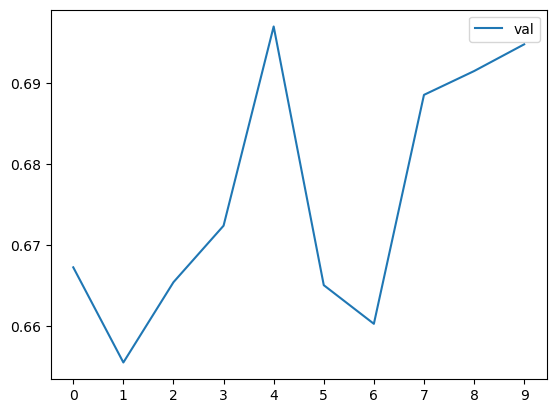

In [33]:
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## Adjusting the learning rate

In [25]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(23)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [26]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 31s 75ms/step - accuracy: 0.3336 - loss: 2.4029 - val_accuracy: 0.6285 - val_loss: 1.3026
Epoch 2/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.6554 - loss: 1.2481 - val_accuracy: 0.6687 - val_loss: 1.0816
Epoch 3/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.7027 - loss: 1.0477 - val_accuracy: 0.6995 - val_loss: 0.9963
Epoch 4/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.7158 - loss: 0.9627 - val_accuracy: 0.7094 - val_loss: 0.9548
Epoch 5/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.7331 - loss: 0.9051 - val_accuracy: 0.7141 - val_loss: 0.9239
Epoch 6/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.7473 - loss: 0.8609 - val_accuracy: 0.7204 - val_loss: 0.9017
Epoch 7/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.7510 - loss: 0.8431 - val_accuracy: 0.7236 - val_loss: 0.8877
Epoch 8/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.7639 - loss: 0.

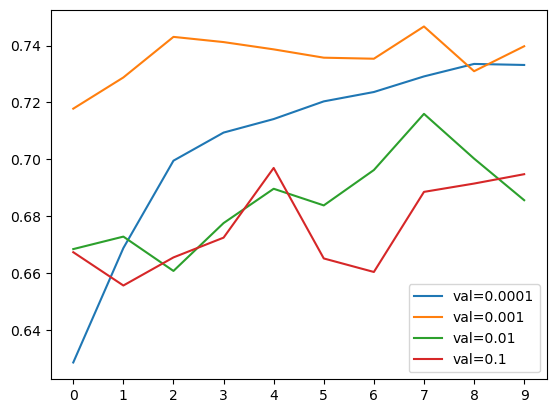

In [27]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

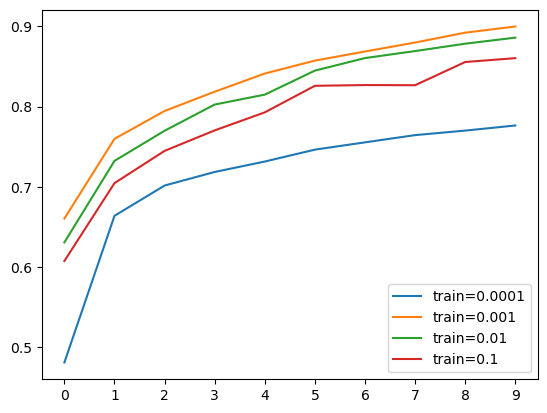

In [28]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [29]:
learning_rate = 0.001

## Checkpointing

In [30]:
model.save_weights('model_v1.weights.h5')

In [31]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [34]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 30s 72ms/step - accuracy: 0.5586 - loss: 1.4994 - val_accuracy: 0.7160 - val_loss: 0.9128
Epoch 2/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.7547 - loss: 0.7989 - val_accuracy: 0.7302 - val_loss: 0.8646
Epoch 3/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.7955 - loss: 0.6781 - val_accuracy: 0.7343 - val_loss: 0.8694
Epoch 4/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8264 - loss: 0.5823 - val_accuracy: 0.7456 - val_loss: 0.8537
Epoch 5/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8474 - loss: 0.5125 - val_accuracy: 0.7408 - val_loss: 0.8677
Epoch 6/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8568 - loss: 0.4769 - val_accuracy: 0.7419 - val_loss: 0.8811
Epoch 7/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.8757 - loss: 0.4228 - val_accuracy: 0.7467 - val_loss: 0.8853
Epoch 8/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8894 - loss: 0.3897 - 

## Adding more layers

In [35]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(23)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [36]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 31s 74ms/step - accuracy: 0.3578 - loss: 2.2020 - val_accuracy: 0.6435 - val_loss: 1.1614
Epoch 2/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.6740 - loss: 1.0964 - val_accuracy: 0.6874 - val_loss: 1.0461
Epoch 3/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.7137 - loss: 0.9578 - val_accuracy: 0.6973 - val_loss: 0.9966
Epoch 4/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.7431 - loss: 0.8669 - val_accuracy: 0.6988 - val_loss: 0.9935
Epoch 5/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.7538 - loss: 0.8201 - val_accuracy: 0.7097 - val_loss: 0.9735
Epoch 6/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.7743 - loss: 0.7475 - val_accuracy: 0.7035 - val_loss: 0.9809
Epoch 7/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.7797 - loss: 0.7303 - val_accuracy: 0.7031 - val_loss: 0.9691
Epoch 8/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.7977 - loss: 0.6770

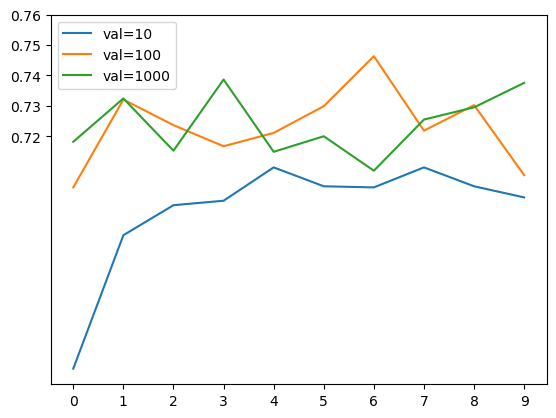

In [38]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.72, 0.73, 0.74, 0.75, 0.76])
plt.legend()

## Regularization and dropout

In [39]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(23)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [40]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 31s 74ms/step - accuracy: 0.5863 - loss: 1.4202 - val_accuracy: 0.7031 - val_loss: 0.9425
Epoch 2/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.7583 - loss: 0.7735 - val_accuracy: 0.7214 - val_loss: 0.9072
Epoch 3/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.7974 - loss: 0.6453 - val_accuracy: 0.7394 - val_loss: 0.8757
Epoch 4/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8354 - loss: 0.5280 - val_accuracy: 0.7379 - val_loss: 0.9162
Epoch 5/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8685 - loss: 0.4190 - val_accuracy: 0.7273 - val_loss: 0.9770
Epoch 6/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8867 - loss: 0.3612 - val_accuracy: 0.7434 - val_loss: 0.9704
Epoch 7/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.9184 - loss: 0.2808 - val_accuracy: 0.7291 - val_loss: 1.0097
Epoch 8/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.9320 - loss: 0.239

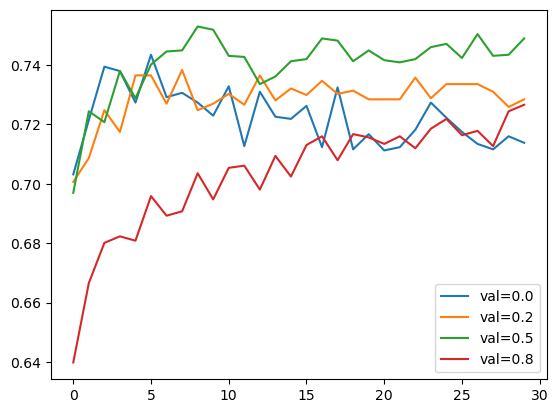

In [47]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))
plt.legend()

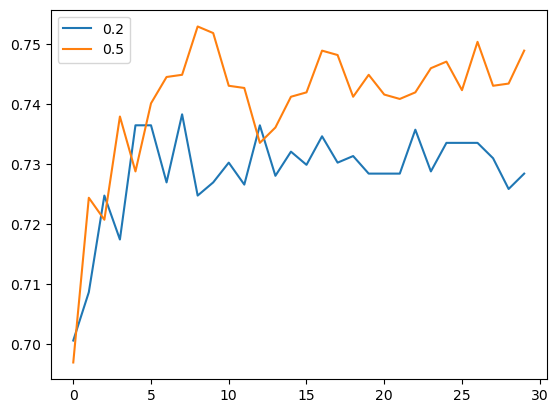

In [50]:
hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

hist = scores[0.5]
plt.plot(hist['val_accuracy'], label=0.5)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## Data augmentation

In [51]:
learning_rate = 0.001
size = 100
droprate = 0.5

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 32s 74ms/step - accuracy: 0.4455 - loss: 1.9548 - val_accuracy: 0.6805 - val_loss: 1.0094
Epoch 2/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.6612 - loss: 1.1345 - val_accuracy: 0.7196 - val_loss: 0.9162
Epoch 3/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.6838 - loss: 1.0418 - val_accuracy: 0.7196 - val_loss: 0.9038
Epoch 4/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.7155 - loss: 0.9308 - val_accuracy: 0.7288 - val_loss: 0.8944
Epoch 5/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.7349 - loss: 0.8487 - val_accuracy: 0.7350 - val_loss: 0.8599
Epoch 6/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.7428 - loss: 0.8175 - val_accuracy: 0.7357 - val_loss: 0.8728
Epoch 7/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.7548 - loss: 0.7702 - val_accuracy: 0.7449 - val_loss: 0.8666
Epoch 8/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.7666 - loss: 0.7184 - 

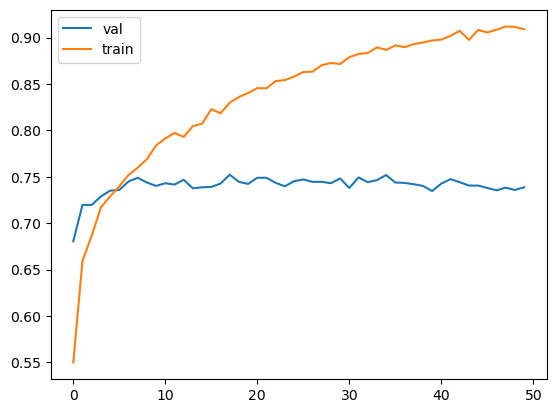

In [52]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## Training a larger model

In [20]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(23)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [21]:
input_size = 299

In [22]:
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input, shear_range=10, zoom_range=0.1, horizontal_flip=True, validation_split=0.2,)

train_ds = data_generator.flow_from_directory(
  './data',
  target_size=(input_size,input_size),
  batch_size=32,
  subset="training"
)

val_ds = data_generator.flow_from_directory(
  './data',
  target_size=(input_size,input_size),
  batch_size=32,
  shuffle=False,
  subset="validation"
)



Found 10979 images belonging to 23 classes.
Found 2732 images belonging to 23 classes.


In [23]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v2_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [ ]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)
history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


2024-12-06 10:29:26.261376: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 17.43GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


311/344 ━━━━━━━━━━━━━━━━━━━━ 18s 546ms/step - accuracy: 0.6222 - loss: 1.4121

2024-12-06 10:32:20.873370: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 16.76GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 552ms/step - accuracy: 0.6324 - loss: 1.3697

/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-12-06 10:33:34.023515: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 16.97GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


344/344 ━━━━━━━━━━━━━━━━━━━━ 262s 719ms/step - accuracy: 0.6327 - loss: 1.3685 - val_accuracy: 0.8170 - val_loss: 0.6099
Epoch 2/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 233s 677ms/step - accuracy: 0.8011 - loss: 0.6608 - val_accuracy: 0.8305 - val_loss: 0.5628
Epoch 3/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 232s 675ms/step - accuracy: 0.8252 - loss: 0.5791 - val_accuracy: 0.8371 - val_loss: 0.5330
Epoch 4/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 232s 674ms/step - accuracy: 0.8455 - loss: 0.5098 - val_accuracy: 0.8448 - val_loss: 0.5378
Epoch 5/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 232s 674ms/step - accuracy: 0.8562 - loss: 0.4711 - val_accuracy: 0.8448 - val_loss: 0.5317
Epoch 6/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 229s 667ms/step - accuracy: 0.8674 - loss: 0.4394 - val_accuracy: 0.8433 - val_loss: 0.5128
Epoch 7/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 232s 673ms/step - accuracy: 0.8882 - loss: 0.3521 - val_accuracy: 0.8521 - val_loss: 0.5257
Epoch 12/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 231s 671ms/step - accuracy: 0.9013 - loss: 0.3

## Using the model

In [25]:
import tensorflow as tf
from tensorflow import keras

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [27]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './data',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 13711 images belonging to 23 classes.


In [28]:
model = keras.models.load_model('xception_v2_10_0.852.keras')

In [29]:
model.evaluate(test_ds)

428/429 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.8780 - loss: 0.4083

2024-12-06 12:27:56.677258: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 17.04GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


429/429 ━━━━━━━━━━━━━━━━━━━━ 95s 213ms/step - accuracy: 0.8781 - loss: 0.4078


[0.30790239572525024, 0.9062796235084534]

In [30]:
path = 'data/Clams/10711395_a16c4c2901_o.jpg'

In [31]:
img = load_img(path, target_size=(299, 299))

In [ ]:
import numpy as np

In [32]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [33]:
X = preprocess_input(X)

In [34]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [35]:
classes = [
    'Clams',
    'Corals',
    'Crabs',
    'Dolphin',
    'Eel',
    'Fish',
    'Jelly Fish',
    'Lobster',
    'Nudibranchs',
    'Octopus',
    'Otter',
    'Penguin',
    'Puffers',
    'Seahorse',
    'Sea Rays',
    'Sea Urchins',
    'Seal',
    'Sharks',
    'Shrimp',
    'Squid',
    'Starfish',
    'Turtle_Tortoise',
    'Whale'
]

In [36]:
dict(zip(classes, pred[0]))

{'Clams': np.float32(5.276881),
 'Corals': np.float32(2.8313737),
 'Crabs': np.float32(-5.966744),
 'Dolphin': np.float32(-4.4443774),
 'Eel': np.float32(-1.3178107),
 'Fish': np.float32(-1.4545512),
 'Jelly Fish': np.float32(-2.7664657),
 'Lobster': np.float32(1.8233558),
 'Nudibranchs': np.float32(-1.7834281),
 'Octopus': np.float32(0.09330644),
 'Otter': np.float32(-4.178798),
 'Penguin': np.float32(-4.4255114),
 'Puffers': np.float32(-0.94791967),
 'Seahorse': np.float32(3.0982559),
 'Sea Rays': np.float32(-0.53828925),
 'Sea Urchins': np.float32(-3.9834552),
 'Seal': np.float32(-5.3834987),
 'Sharks': np.float32(-2.974616),
 'Shrimp': np.float32(-1.5158024),
 'Squid': np.float32(-0.44033724),
 'Starfish': np.float32(-4.761718),
 'Turtle_Tortoise': np.float32(-3.1611464),
 'Whale': np.float32(-6.2088304)}